In [3]:
import random
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 15})
plt.rc('font',family='serif', serif=['Arial'])
frameon=False
CB91_Green = '#47DBCD'
CB91_Amber = '#F5B14C'
CB91_Blue = '#2CBDFE'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = ['red', CB91_Blue, 'green', CB91_Amber, CB91_Pink]
matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set_style('white')

pgf_with_rc_fonts = {"pgf.texsystem": "pdflatex"}
matplotlib.rcParams.update(pgf_with_rc_fonts)
matplotlib.rcParams['text.usetex'] = True

def set_style():
    sns.set(font='serif', font_scale=1.4)
    
   # Make the background white, and specify the
    # specific font family
    sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

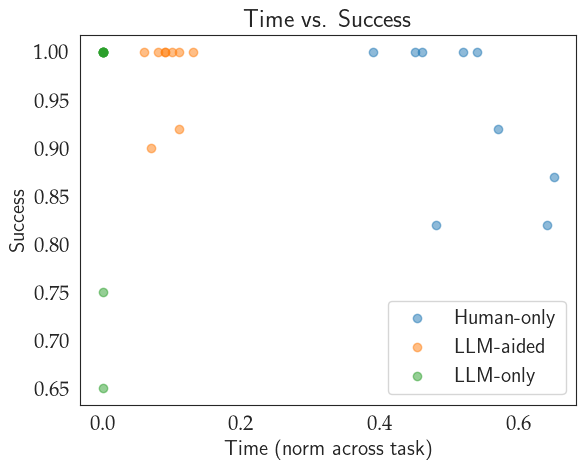

In [4]:
human_only_success = [1.00, 1.00, 1.00, 0.87, 0.82, 0.82, 0.92, 1.00, 1.00]
LLM_aide_success = [1.00, 1.00, 1.00, 1.00, 0.90, 0.92, 1.00, 1.00, 1.00]
human_only_time = [0.54, 0.46, 0.39, 0.65, 0.64, 0.48, 0.57, 0.45, 0.52]
LLM_aide_time = [0.10, 0.13, 0.08, 0.11, 0.07, 0.11, 0.09, 0.06, 0.09]
LLM_only_time = [0, 0, 0, 0, 0, 0, 0, 0, 0]
LLM_only_success = [1.00, 1.00, 1.00, 1.00, 0.65, 0.75, 1.00, 1.00, 1.00]

plt.scatter(human_only_time, human_only_success, alpha=0.5, label='Human-only')
plt.scatter(LLM_aide_time, LLM_aide_success, alpha=0.5, label='LLM-aided')
plt.scatter(LLM_only_time, LLM_only_success, alpha=0.5, label='LLM-only')

plt.title("Time vs. Success")
plt.xlabel("Time (norm across task)")
plt.ylabel("Success")
plt.legend()

plt.savefig('time_success.pdf', format="pdf", bbox_inches="tight")
plt.show()

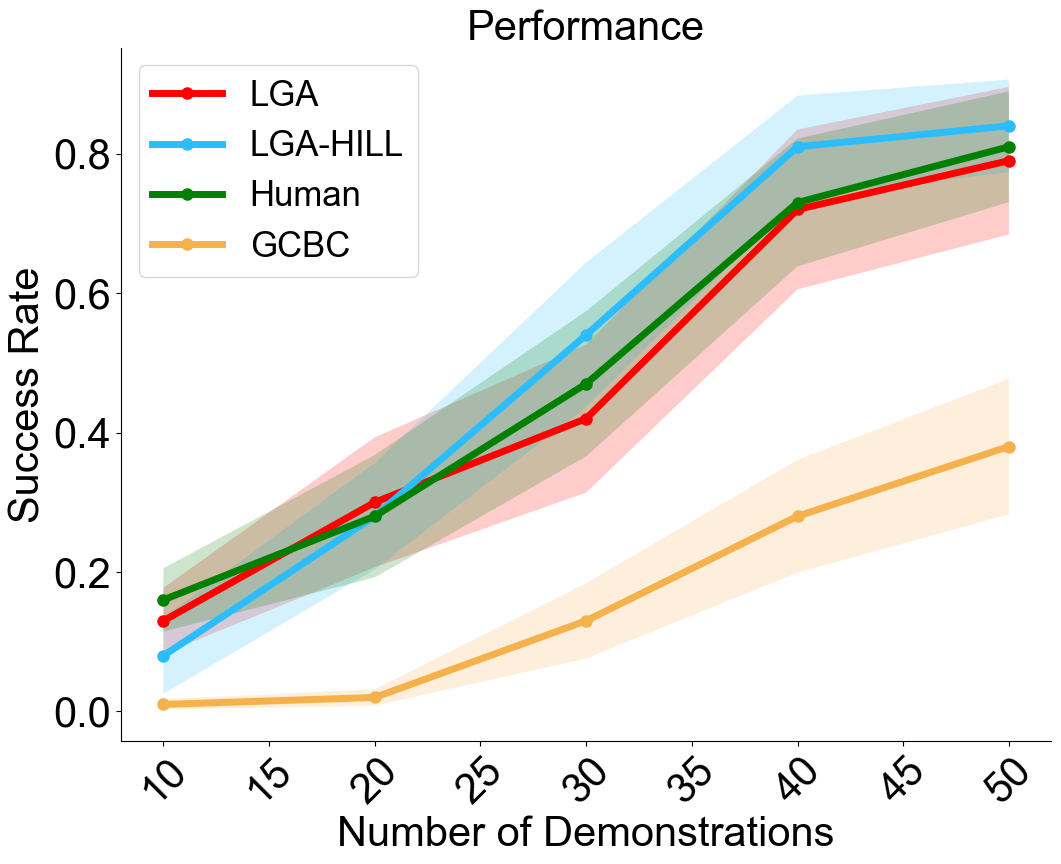

In [3]:
# task learning
x = [10, 20, 30, 40, 50]
lga = [0.13,0.30,0.42,0.72,0.79]
lga_err = np.asarray([0.04722222222,0.09316949906,0.1061023847,0.1145643924,0.105883992])
lga_hill = [0.08, 0.28, 0.54, 0.81, 0.84]
lga_hill_err = np.asarray([0.05464532104,0.07637626158,0.1038978012,0.07333543768,0.06637668414])
human = [0.16, 0.28, 0.47, 0.73, 0.81]
human_err = np.asarray([0.04547418207,0.08779711461,0.1041203601,0.09166666667,0.07939781071])
bc = [0.01, 0.02, 0.13, 0.28,0.38]
bc_err = np.asarray([0.007349309197,0.01178511302,0.05400617249,0.08084240117,0.09722222222])


fig1 = plt.figure(figsize=(12,9))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
ax1 = fig1.add_subplot()
ax1.set_title("Performance")
ax1.plot(x, lga, '-', label="LGA", marker='o', markersize=8, linewidth=5)
ax1.fill_between(x, lga+lga_err, lga-lga_err,  alpha=0.2)
ax1.plot(x, lga_hill, '-', label="LGA-HILL", marker='o', markersize=8, linewidth=5)
ax1.fill_between(x, lga_hill+lga_hill_err, lga_hill-lga_hill_err,  alpha=0.2)
ax1.plot(x, human, '-', label="Human", marker='o', markersize=8, linewidth=5)
ax1.fill_between(x, human+human_err, human-human_err,  alpha=0.2)
ax1.plot(x, bc, '-', label="GCBC", marker='o', markersize=8, linewidth=5)
ax1.fill_between(x, bc+bc_err, bc-bc_err,  alpha=0.2)

sns.despine()
ax1.legend(prop={'size': 25},loc='upper left')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_ylabel('Success Rate')
ax1.set_xlabel('Number of Demonstrations')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(30)
fig1.savefig('q1_success.pdf', bbox_inches='tight')

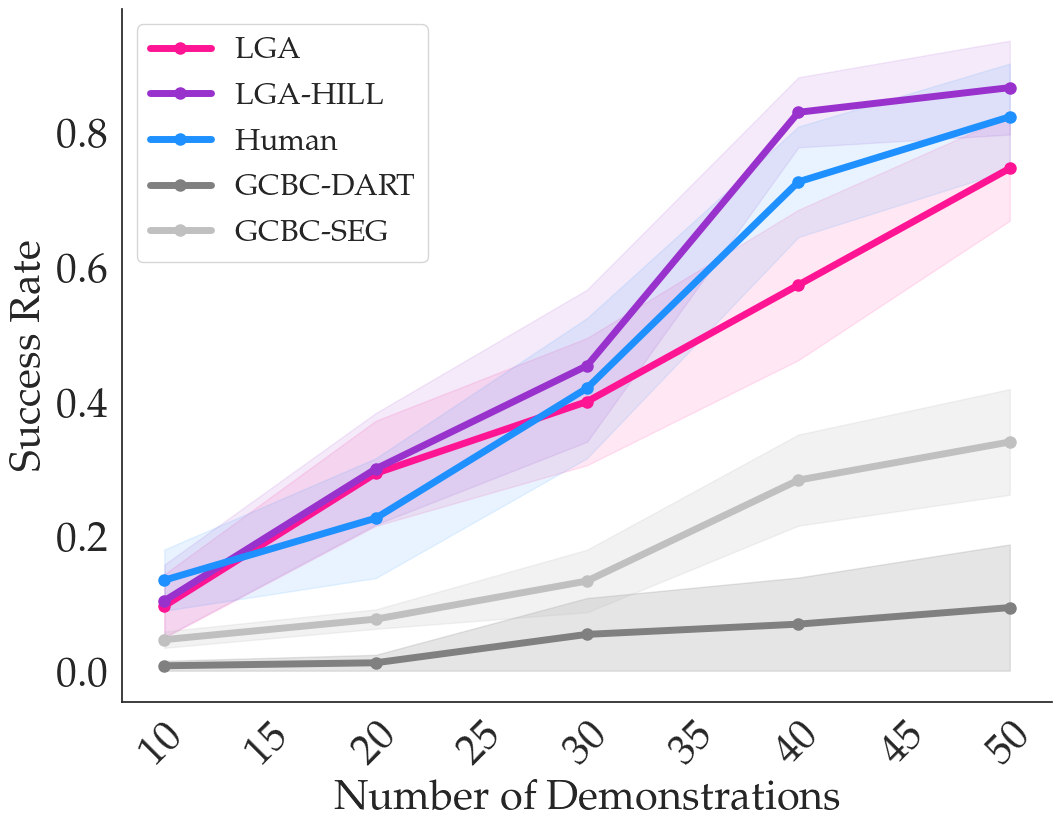

In [10]:
# task learning
x = [10, 20, 30, 40, 50]
lga = [0.096153846,0.293333333,0.4,0.573333333,0.746666667]
lga_err = np.asarray([0.047222222,0.07807483,0.094566914,0.111734363,0.077926445])
lga_hill = [0.103846154,0.3,0.453333333,0.83,0.866666667]
lga_hill_err = np.asarray([0.05386311,0.08291562,0.113072958,0.05204165,0.069721669])
human = [0.134615385,0.226666667,0.42,0.726666667,0.823333333]
human_err = np.asarray([0.045474182,0.089019002,0.10412036,0.082073815,0.079056942])
gcbc_dart = [0.007349309,0.011785113,0.054006172,0.069221866,0.093829699]
gcbc_dart_err = np.asarray([0.007349309,0.011785113,0.054006172,0.069221866,0.093829699])
gcbc_seg = [0.046153846,0.076666667,0.133333333,0.283333333,0.34]
gcbc_seg_err = np.asarray([0.012108053,0.014433757,0.046481113,0.06770032,0.0785183])

set_style()
fig1 = plt.figure(figsize=(12,9))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
ax1 = fig1.add_subplot()
#ax1.set_title("Performance")
ax1.plot(x, lga, '-', label="LGA", marker='o', markersize=8, linewidth=5,color='deeppink')
ax1.fill_between(x, lga+lga_err, lga-lga_err,  alpha=0.1,color='deeppink')
ax1.plot(x, lga_hill, '-', label="LGA-HILL", marker='o', markersize=8, linewidth=5,color='darkorchid')
ax1.fill_between(x, lga_hill+lga_hill_err, lga_hill-lga_hill_err,  alpha=0.1,color='darkorchid')
ax1.plot(x, human, '-', label="Human", marker='o', markersize=8, linewidth=5,color='dodgerblue')
ax1.fill_between(x, human+human_err, human-human_err,  alpha=0.1,color='dodgerblue')
ax1.plot(x, gcbc_dart, '-', label="GCBC-DART", marker='o', markersize=8, linewidth=5,color='gray')
ax1.fill_between(x, gcbc_dart+gcbc_dart_err, gcbc_dart-gcbc_dart_err,  alpha=0.2,color='gray')
ax1.plot(x, gcbc_seg, '-', label="GCBC-SEG", marker='o', markersize=8, linewidth=5,color='silver')
ax1.fill_between(x, gcbc_seg+gcbc_seg_err, gcbc_seg-gcbc_seg_err,  alpha=0.2,color='silver')

sns.despine()
ax1.legend(prop={'size': 22},loc='upper left')
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)
ax1.set_ylabel('Success Rate')
ax1.set_xlabel('Number of Demonstrations')
for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
    item.set_fontsize(30)
fig1.savefig('q1_success.pdf', bbox_inches='tight')